##### **Developed By - Khouloud Moussaoui**
##### **Email  (khouloudmoussaoui99@gmail.com)**

---
 **MACHINE LEARNING INTERNSHIP**
## **TASK 1 : BREAST CANCER CLASSIFICATION**
#### A Machine Learning approach for the classification of breast cancer using the different classical Machine Learning Algorithms.

![title](breastcancer.png)

**Description** : Breast cancer is one of the most widespread diseases among women all over the world. Correct and early diagnosis is an extremely important step in rehabilitation and treatment. However, it is not an easy one due to several uncertainties in detection using mammograms. Machine Learning (ML) techniques can be used to develop tools for physicians that can be used as an effective mechanism for early detection and diagnosis of breast cancer which will greatly enhance the survival rate of patients. This project compares three of the most popular ML techniques commonly used for breast cancer detection and diagnosis, namely:
 ***K-Nearest Neighbors (KNN), 
 **Random Forest Classifier, 
 **Linear 
**Regression, 
**Decision Tree Classifier, 
**Logistic Regression



**Dataset -** https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data


# EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

In [2]:
# Defining the function to display the boxplot and histogram graphs
def hist_box_plot(df, column, height=15, width=5):
    fig, axes = plt.subplots(1, 2, figsize=(height, width))
    sns.histplot(ax=axes[0], data = df[column]);
    axes[0].set_title(f'Histogram for {column}')
    sns.boxplot(ax=axes[1], data = df[column]);
    axes[1].set_title(f'Boxplot for {column}')
    plt.show();

In [5]:
# Reading the Dataset
data = pd.read_csv('DATASET/data.csv')
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


**Prediction of Breast Cancer : Benign or Malignant**

To Predict if the cancer diagnosis is benign or malignant based on several observations/features
30 features are used, examples:

  - radius (mean of distances from center to points on the perimeter)
  - texture (standard deviation of gray-scale values)
  - perimeter
  - area
  - smoothness (local variation in radius lengths)
  - compactness (perimeter^2 / area - 1.0)
  - concavity (severity of concave portions of the contour)
  - concave points (number of concave portions of the contour)
  - symmetry
  - fractal dimension ("coastline approximation" - 1)
Datasets are linearly separable using all 30 input features

Number of Instances: 569
Class Distribution: 212 Malignant, 357 Benign
Target class:
   - Malignant
   - Benign

In [6]:
# Removing columns that will not be used
data = data[[c for c in data.columns if (('_se' not in c) and ('_worst' not in c))]]
data.drop('id', axis=1, inplace=True)

In [7]:
# Displaying the first 5 rows of the dataset
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,NaN


In [8]:
data.shape

(569, 12)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
 11  Unnamed: 32             0 non-null      float64
dtypes: float64(11), object(1)
memory usage: 53.5+ KB


In [10]:
# Displays a statistical summary of the data
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.78000,28.11000
texture_mean,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.80000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.10000,188.50000
area_mean,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.70000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.10530,0.16340
compactness_mean,569.0,0.104341,0.052813,0.01938,0.06492,0.09263,0.13040,0.34540
concavity_mean,569.0,0.088799,0.079720,0.00000,0.02956,0.06154,0.13070,0.42680
concave points_mean,569.0,0.048919,0.038803,0.00000,0.02031,0.03350,0.07400,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.10600,0.16190,0.17920,0.19570,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.04996,0.05770,0.06154,0.06612,0.09744


In [11]:
for col in data.iloc[:, 1:].columns:
    print(col)

radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
Unnamed: 32


In [12]:
# Delete the "Unnamed: 32" column
data.drop(columns=["Unnamed: 32"], inplace=True)

# Verify that the column is deleted
print(data.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')


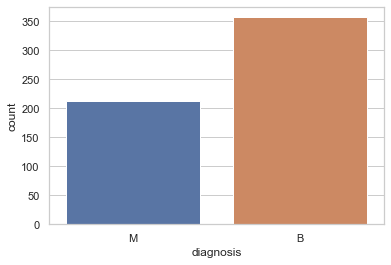

In [14]:
sns.countplot(data=data, x='diagnosis');

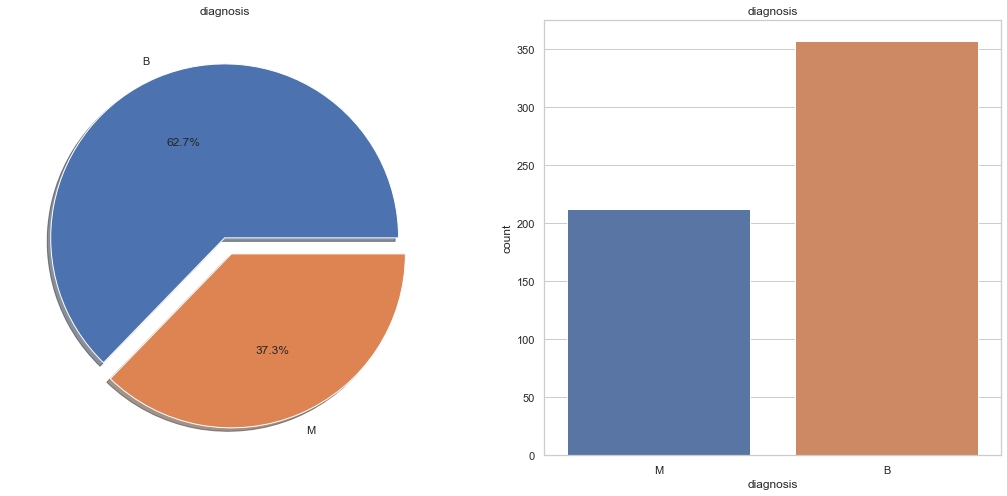

In [15]:
# Show data diagnosis Breast Cancer on Pie chart and Bar chart

f, ax = plt.subplots(1, 2, figsize=(18, 8))

data['diagnosis'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)

ax[0].set_title('diagnosis')

ax[0].set_ylabel('')

sns.countplot(x='diagnosis', data=data, ax=ax[1])

ax[1].set_title('diagnosis')

plt.show()

<AxesSubplot:xlabel='area_mean', ylabel='smoothness_mean'>

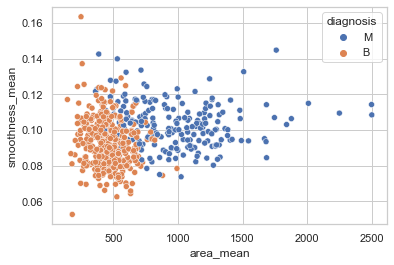

In [17]:
sns.scatterplot(x = 'area_mean', y = 'smoothness_mean', hue = 'diagnosis', data = data)

In [18]:
data_copy = data.copy()
data_copy['diagnosis'] = data_copy['diagnosis'].map({'M': 1, 'B': 0})

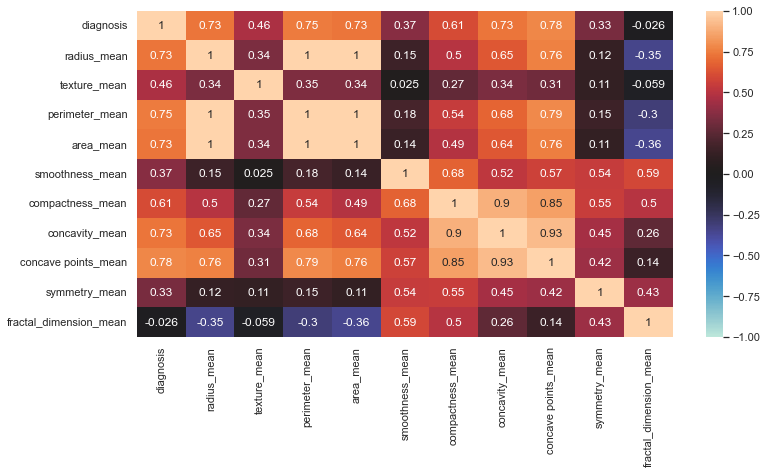

In [19]:
# Displays a heat map based on the correlation coefficient of the variables
corr = data_copy.corr('spearman')
plt.figure(figsize=(12, 6))
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True);

# Preprocessing

#### Splitting Data into Dependent and Independent Variables

In [20]:
# Independent variables (predictors)
X = data_copy.drop('diagnosis', axis=1)

# Dependent variable
y = data_copy['diagnosis']

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [22]:
# Data Standardization
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Training Machine Learning Models

### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression(random_state=123)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, classification_report

Accuracy: 0.9385964912280702
Precision: 1.0
F1: 0.9066666666666667
Recall: 0.8292682926829268
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        73
           1       1.00      0.83      0.91        41

    accuracy                           0.94       114
   macro avg       0.96      0.91      0.93       114
weighted avg       0.94      0.94      0.94       114

AxesSubplot(0.125,0.125;0.62x0.755)


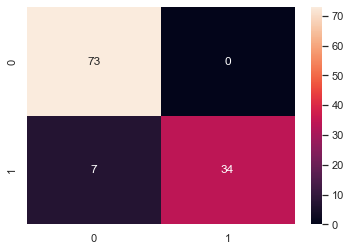

In [28]:
print('Accuracy:',accuracy_score(y_test, y_pred))
print('Precision:',precision_score(y_test, y_pred))
print('F1:',f1_score(y_test, y_pred))
print('Recall:',recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(sns.heatmap(confusion_matrix(y_test, y_pred), annot=True))

In [29]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluting the model
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [30]:
# Storing evaluation metrics to a dataframe
results = pd.DataFrame([['Logistic Regression', acc, pre, rec, f1]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.938596,1.0,0.829268,0.906667


### Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
model = DecisionTreeClassifier(criterion='entropy',class_weight='balanced',random_state=123)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy: 0.9210526315789473
Precision: 0.9
F1: 0.888888888888889
Recall: 0.8780487804878049
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        73
           1       0.90      0.88      0.89        41

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114

AxesSubplot(0.125,0.125;0.62x0.755)


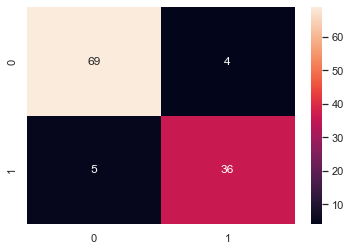

In [33]:
print('Accuracy:',accuracy_score(y_test, y_pred))
print('Precision:',precision_score(y_test, y_pred))
print('F1:',f1_score(y_test, y_pred))
print('Recall:',recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(sns.heatmap(confusion_matrix(y_test, y_pred), annot=True))

In [34]:

# Evaluting the model
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [35]:
# Storing evaluation metrics to a dataframe
results = pd.DataFrame([['DecisionTreeClassifier', acc, pre, rec, f1]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results

,Model,Accuracy,Precision,Recall,F1 Score
0,DecisionTreeClassifier,0.921053,0.9,0.878049,0.888889


**Hyperparameter tuning with grid search**

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
dt = DecisionTreeClassifier(random_state = 42)

In [38]:
parameters = {"max_depth":[1, 2, 3, 4, 5, 7, 10],
              "min_samples_leaf": [1, 3, 6, 10, 20]}

In [39]:
clf = GridSearchCV(dt, parameters, n_jobs= 1)

In [40]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 7, 10],
                         'min_samples_leaf': [1, 3, 6, 10, 20]})

In [41]:
print(clf.best_params_)

{'max_depth': 3, 'min_samples_leaf': 1}


In [42]:
print(clf.score)

<bound method BaseSearchCV.score of GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 7, 10],
                         'min_samples_leaf': [1, 3, 6, 10, 20]})>


In [43]:
best_score = clf.best_score_

In [44]:
print(f"Best score: {best_score}")

Best score: 0.9318681318681319


In [45]:
from sklearn.model_selection import GridSearchCV

# Assuming you have already performed grid search and stored the results in `clf`

best_score = clf.best_score_
print(f"Best score: {best_score}")

Best score: 0.9318681318681319


In [46]:
best_score

0.9318681318681319

In [47]:
from sklearn import tree

# Define the tree structure
clf = tree.DecisionTreeClassifier()

# Train the tree on some data
clf.fit(X_train, y_train)

# Get the tree structure as a string
tree_str = tree.export_text(clf)

# Print the tree structure
print(tree_str)

|--- feature_7 <= 0.24
|   |--- feature_3 <= 0.23
|   |   |--- feature_1 <= 0.40
|   |   |   |--- class: 0
|   |   |--- feature_1 >  0.40
|   |   |   |--- feature_7 <= 0.22
|   |   |   |   |--- feature_1 <= 0.40
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  0.40
|   |   |   |   |   |--- feature_4 <= 0.34
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4 >  0.34
|   |   |   |   |   |   |--- feature_4 <= 0.35
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_4 >  0.35
|   |   |   |   |   |   |   |--- feature_2 <= 0.30
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_2 >  0.30
|   |   |   |   |   |   |   |   |--- feature_9 <= 0.24
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_9 >  0.24
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_7 >  0.22
|   |   |   |   |--- feature_4 <= 0.55
|   |   |   |   |   |--

In [48]:
from sklearn.tree import plot_tree

In [49]:
import pandas as pd

# Convert X to a DataFrame if it's not already
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)

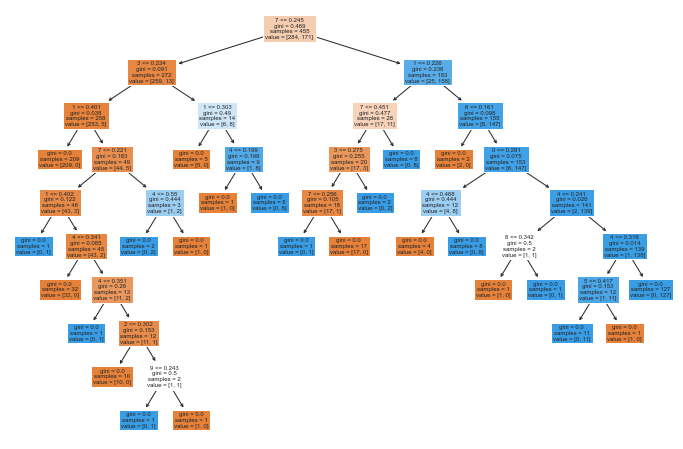

In [50]:
# Visualiser l'arbre de décision
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns)
plt.show()

### KNN

**K Nearest Neighbour(KNN)**
is a Supervised Machine Learning Technique that assumes the similarity between the new data and available data and puts the new data into the category closest to the available categories.


In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
clf = KNeighborsClassifier(n_neighbors=12)

In [53]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Accuracy: 0.9210526315789473
Precision: 0.9
F1: 0.888888888888889
Recall: 0.8780487804878049
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        73
           1       0.90      0.88      0.89        41

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114

AxesSubplot(0.125,0.125;0.62x0.755)


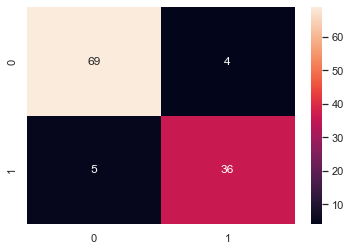

In [54]:
print('Accuracy:',accuracy_score(y_test, y_pred))
print('Precision:',precision_score(y_test, y_pred))
print('F1:',f1_score(y_test, y_pred))
print('Recall:',recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(sns.heatmap(confusion_matrix(y_test, y_pred), annot=True))

In [55]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluting the model
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [56]:
# Storing evaluation metrics to a dataframe
results = pd.DataFrame([['KNN', acc, pre, rec, f1]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results

,Model,Accuracy,Precision,Recall,F1 Score
0,KNN,0.921053,0.9,0.878049,0.888889


### Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
model = RandomForestClassifier(n_estimators=500, max_depth=3,random_state=123)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy: 0.9736842105263158
Precision: 0.975
F1: 0.9629629629629629
Recall: 0.9512195121951219
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        73
           1       0.97      0.95      0.96        41

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

AxesSubplot(0.125,0.125;0.62x0.755)


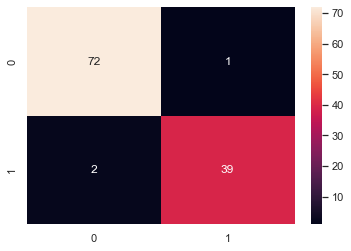

In [59]:
print('Accuracy:',accuracy_score(y_test, y_pred))
print('Precision:',precision_score(y_test, y_pred))
print('F1:',f1_score(y_test, y_pred))
print('Recall:',recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(sns.heatmap(confusion_matrix(y_test, y_pred), annot=True))

In [60]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluting the model
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [61]:
# Storing evaluation metrics to a dataframe
results = pd.DataFrame([['Random Forest', acc, pre, rec, f1]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.973684,0.975,0.95122,0.962963


### Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [64]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [65]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [66]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [67]:
# The coefficients
print("Coefficients: \n", regr.coef_)

Coefficients: 
 [ 1.03930658e+01  6.48051919e-01 -8.27483256e+00 -1.89999651e+00
  1.91876775e-01  1.53880951e-01  2.41923085e-01  1.27779786e+00
  2.13536113e-01 -1.51207439e-04]


In [68]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

Mean squared error: 0.08


In [69]:
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))

Coefficient of determination: 0.67


In [70]:
# Storing evaluation metrics to a dataframe
results = pd.DataFrame([['KNN', acc, pre, rec, f1]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results

,Model,Accuracy,Precision,Recall,F1 Score
0,KNN,0.973684,0.975,0.95122,0.962963


In [71]:
# Storing evaluation metrics to a dataframe
results = pd.DataFrame([['Random Forest', acc, pre, rec, f1]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.973684,0.975,0.95122,0.962963


In [72]:
# Storing evaluation metrics to a dataframe
results = pd.DataFrame([['Logistic Regression', acc, pre, rec, f1]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.973684,0.975,0.95122,0.962963


In [73]:
# Storing evaluation metrics to a dataframe
results = pd.DataFrame([['DecisionTreeClassifier', acc, pre, rec, f1]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results

,Model,Accuracy,Precision,Recall,F1 Score
0,DecisionTreeClassifier,0.973684,0.975,0.95122,0.962963
